# Smart Campus – Concept Overview & Data Exploration

👩‍🎓 **Students:**

- Name:    ID:
- Name:    ID:
- Name:    ID:
- Name:    ID:




---



## 📖 Project Overview

A **Smart Campus** integrates IoT (temperature, motion, light sensors), AI algorithms, and Big Data analytics
to optimize campus operations, improve energy efficiency, and enhance user comfort.

**Key Technologies:**  
-  IoT sensors for environmental monitoring
-  AI models for occupancy detection and prediction 
-  Cloud/Edge computing for real-time data processing

**Benefits:**  
- Energy savings, improved resource allocation, enhanced comfort  

**Challenges:**  
- Data privacy, integration complexity, and cost  

📌 In this project, we analyze real sensor data (temperature, CO₂, humidity, light) from a campus room to detect occupancy patterns and build predictive models using Python.


## Phase 1: Exploratory Data Analysis (EDA)

## Step 1 – Loading and Previewing the Dataset

In this step, we import the required libraries and load the dataset (`Occupancy.csv`), which contains environmental sensor readings from a building room.

Each row includes:
- ⏱️ Timestamp (`noted_date`) – when the measurement was taken
- 🌡️ Temperature (`temp`) – room temperature values
- 📍 Location (`in / out`) – whether the sensor was inside or outside the

We use pandas for data handling and matplotlib / seaborn for visualizations.


In [260]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
# Load the dataset
df = pd.read_csv("Occupancy.csv")

# Display the first few rows
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


## Step 2 – Dataset Overview

Before analyzing the data, we first check its general structure to ensure data quality:

- 📊 **Number of rows and columns** – overall dataset size
- 🏷️ **Column names and data types** – identify variable formats
- ⚠️ **Missing values** – detect incomplete records
- 🔁 **Duplicate rows** – check for repeated entries

✔️ This step helps ensure the dataset is clean and reliable before proceeding with deeper analysis and visualizations.


In [265]:
# Shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

# Column names and data types
print("\nColumn info:")
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Shape of the dataset: (20560, 7)

Column info:
date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

Missing values per column:
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

Number of duplicate rows: 0


In [267]:
# Descriptive statistics
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [269]:
# Average occupancy rate
print("Average occupancy:", df["Occupancy"].mean())

Average occupancy: 0.23103112840466927


📈 **General Statistics:**

- 🌡️ **Average Temperature:** ~20.9 °C
- 🕒 **Room Occupancy:** ~23% of the time

This indicates an imbalance in occupancy, which is important to consider when interpreting environmental behavior and detecting anomalies.

## Step 3 – Convert Date Column to Datetime Format

The `date` column is currently of type `object`, meaning it is treated as a regular string.  
To perform time-based analysis, we must convert it to proper `datetime` format.


In [273]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if conversion was successful
print("New data type of 'date':", df['date'].dtype)

# Display the first few rows to verify
df[['date']].head()

New data type of 'date': datetime64[ns]


,date
0,2015-02-02 14:19:00
1,2015-02-02 14:19:59
2,2015-02-02 14:21:00
3,2015-02-02 14:22:00
4,2015-02-02 14:23:00


## Step 4 – Variable Distributions by Occupancy

In this step, we compare the distributions of environmental variables between occupied and unoccupied states.
By using histograms and boxplots, we can better understand the range, variability, and central tendency of each variable, and highlight noticeable differences linked to room occupancy.

- 🌡️ Temperature – effect of occupancy on room climate.
- 💨 CO₂ – changes in air quality when people are present.
- 💡 Light – differences in lighting between occupied and empty states.
- 💧 Humidity – potential variations in moisture levels with occupancy.

## 4.1 🌡️ Temperature Distribution by Occupancy



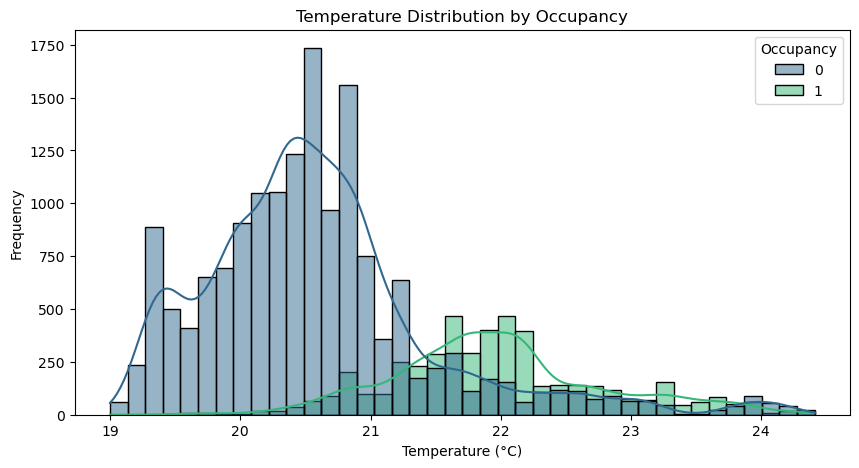

In [277]:
# Histogram of Temperature by Occupancy
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Temperature", hue="Occupancy", bins=40, kde=True, palette="viridis")
plt.title("Temperature Distribution by Occupancy")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

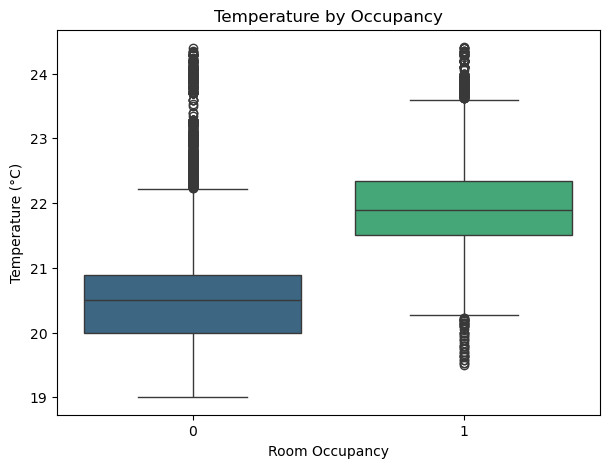

In [300]:
# Boxplot of Temperature by Occupancy
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Occupancy", y="Temperature", hue="Occupancy", palette="viridis", legend=False)
plt.title("Temperature by Occupancy")
plt.xlabel("Room Occupancy")
plt.ylabel("Temperature (°C)")
plt.show()

**Summary:**
The distribution shows relatively stable values, with lower-than-expected averages during occupancy.

### 4.2 – 💨 CO₂ Distribution by Occupancy


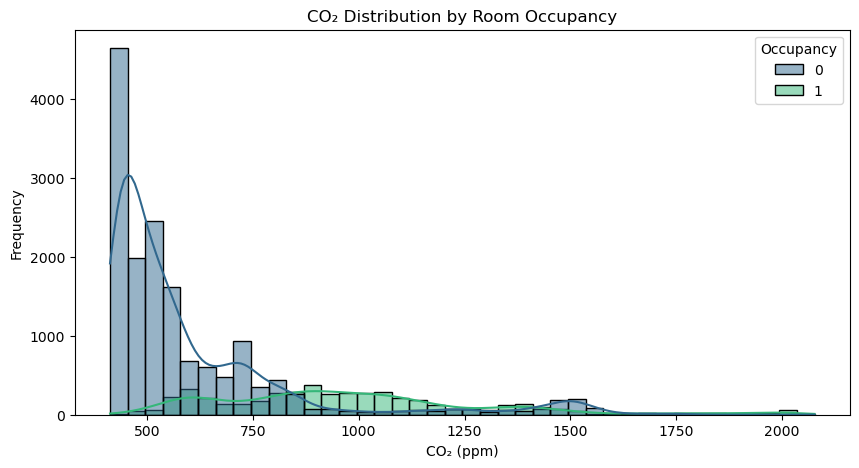

In [283]:
# Histogram of CO₂ by occupancy
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="CO2", hue="Occupancy", bins=40, kde=True, palette="viridis")
plt.title("CO₂ Distribution by Room Occupancy")
plt.xlabel("CO₂ (ppm)")
plt.ylabel("Frequency")
plt.show()

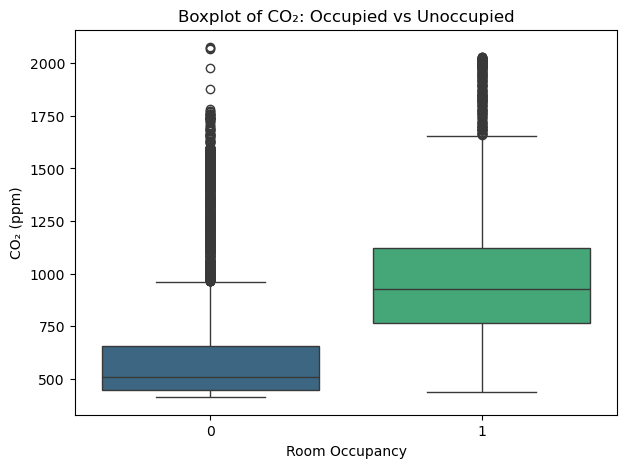

In [285]:
# Boxplot of CO₂ by occupancy
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Occupancy", y="CO2", hue="Occupancy", palette="viridis", legend=False)
plt.title("Boxplot of CO₂: Occupied vs Unoccupied")
plt.xlabel("Room Occupancy")
plt.ylabel("CO₂ (ppm)")
plt.show()

**Summary:**
CO₂ levels rise significantly when the room is occupied, confirming its role as a strong occupancy indicator.

### 4.3 – 💡 Light Distribution by Occupancy


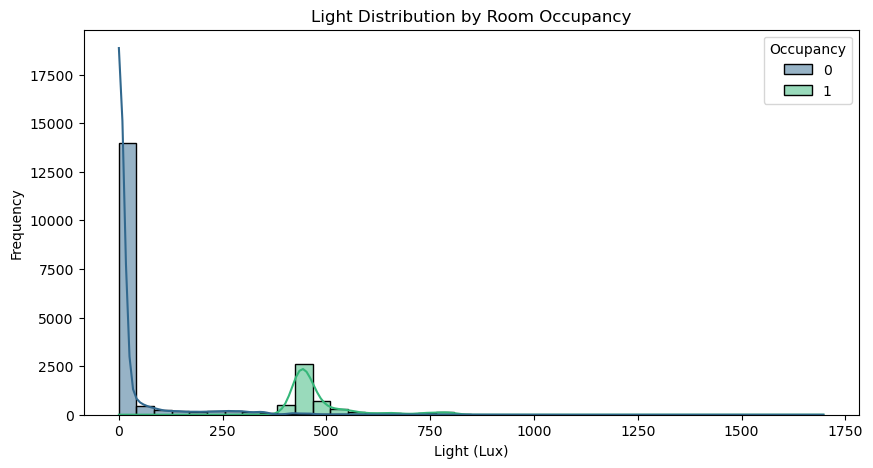

In [290]:
# Histogram of Light by occupancy
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Light", hue="Occupancy", bins=40, kde=True, palette="viridis")
plt.title("Light Distribution by Room Occupancy")
plt.xlabel("Light (Lux)")
plt.ylabel("Frequency")
plt.show()


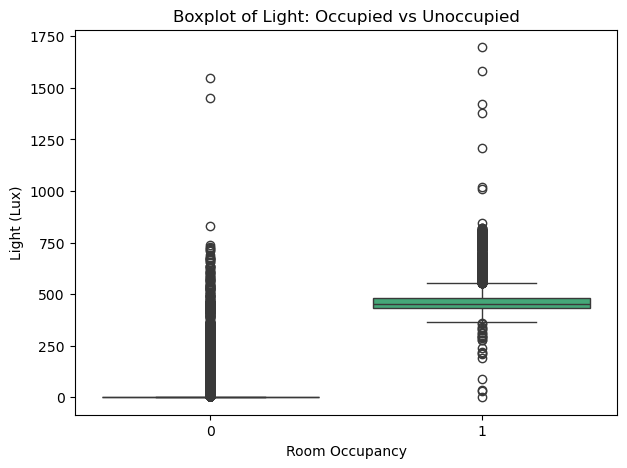

In [292]:
# Boxplot of Light by occupancy
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Occupancy", y="Light", hue="Occupancy", palette="viridis", legend=False)
plt.title("Boxplot of Light: Occupied vs Unoccupied")
plt.xlabel("Room Occupancy")
plt.ylabel("Light (Lux)")
plt.show()

**Summary:**
Light intensity increases sharply during occupancy, making it the most reliable signal of presence.

### 4.4 – 💧 Humidity Distribution by Occupancy

Only minor differences are observed, indicating a weak relation to occupancy.

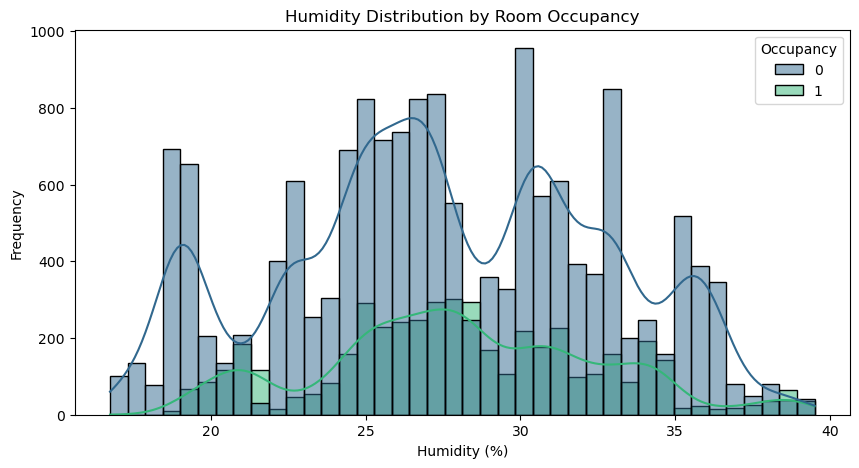

In [295]:
# Histogram of Humidity by occupancy
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Humidity", hue="Occupancy", bins=40, kde=True, palette="viridis")
plt.title("Humidity Distribution by Room Occupancy")
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.show()

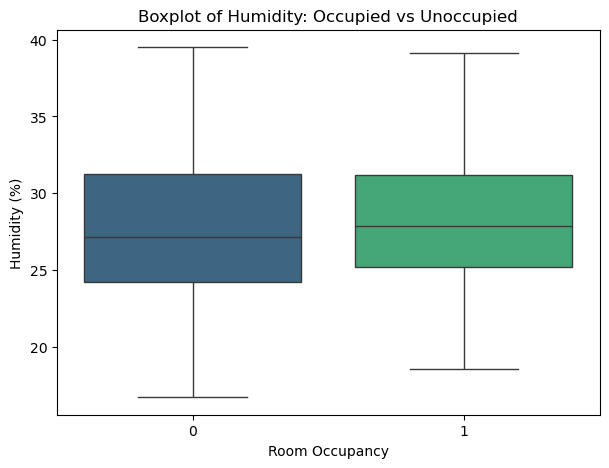

In [297]:
# Boxplot of Humidity by occupancy
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Occupancy", y="Humidity", hue="Occupancy", palette="viridis", legend=False)
plt.title("Boxplot of Humidity: Occupied vs Unoccupied")
plt.xlabel("Room Occupancy")
plt.ylabel("Humidity (%)")
plt.show()

**Summary:**
Light intensity increases sharply during occupancy, making it the most reliable signal of presence.

## Step 5 – Average Sensor Values by Room Occupancy

In this step, we calculate the average values (mean) and standard deviation (std) for each environmental variable (Temperature, CO₂, Light, Humidity), comparing occupied vs. unoccupied states.
This helps us understand how room occupancy affects different environmental conditions.

## 5.1 – 🌡️ Average Temperature by Room Occupancy

In [316]:
temp_stats = df.groupby("Occupancy")["Temperature"].agg(["mean", "std"]).round(2)
temp_stats.rename(index={0: "Unoccupied", 1: "Occupied"}, inplace=True)
temp_stats


,mean,std
Occupancy,,
Unoccupied,20.58,0.89
Occupied,21.98,0.82


**Summary:**
The average temperature is slightly higher when the room is occupied (21.98°C vs 20.58°C), but the difference is small.

## 5.2 – 💨 Average CO₂ by Room Occupancy

In [324]:
co2_stats = df.groupby("Occupancy")["CO2"].agg(["mean", "std"]).round(2)
co2_stats.rename(index={0: "Unoccupied", 1: "Occupied"}, inplace=True)
co2_stats


,mean,std
Occupancy,,
Unoccupied,605.00,253.03
Occupied,975.32,317.26


**Summary:**
CO₂ levels rise significantly during occupancy (975 ppm vs 605 ppm), clearly indicating human presence.

## 5.3 – 💡 Average Light by Room Occupancy

In [328]:
light_stats = df.groupby("Occupancy")["Light"].agg(["mean", "std"]).round(2)
light_stats.rename(index={0: "Unoccupied", 1: "Occupied"}, inplace=True)
light_stats


,mean,std
Occupancy,,
Unoccupied,25.24,81.82
Occupied,481.97,94.70


**Summary:**
Light values are much higher when the room is occupied (482 vs 25), showing a strong correlation with occupancy.

## 5.4 – 💧 Average Humidity by Room Occupancy

In [334]:
humidity_stats = df.groupby("Occupancy")["Humidity"].agg(["mean", "std"]).round(2)
humidity_stats.rename(index={0: "Unoccupied", 1: "Occupied"}, inplace=True)
humidity_stats

,mean,std
Occupancy,,
Unoccupied,27.53,5.12
Occupied,28.08,4.47


**Summary:**
Humidity values show only minor differences (28.08 vs 27.53), suggesting a weak relation to occupancy.

## Step 6 - Investigating Environmental Variables by Occupancy

In this step, we investigate how each environmental variable behaves depending on room occupancy.
The analysis is divided into four parts:

- 🌡️Temperature by Occupancy – Examining how temperature levels vary between occupied and unoccupied states.

- 💨CO₂ Levels by Occupancy – Analyzing changes in CO₂ concentration and its relation to presence in the room.

- 💧Humidity by Occupancy – Evaluating humidity patterns under different occupancy conditions.

- 💡Light by Occupancy – Observing how light intensity differs when the room is occupied vs. empty.


## 6.1 – 🌡️Temperature by Occupancy

We check how temperature differs between occupied and unoccupied states, using histograms and boxplots to examine distribution and variability.

In [190]:
# Compare average environmental values between occupied and unoccupied states
env_stats = df.groupby("Occupancy")[["CO2", "Light", "Humidity"]].mean().round(2)

# Rename index for clarity
env_stats.rename(index={0: "Unoccupied", 1: "Occupied"}, inplace=True)

# Display results
env_stats

,CO2,Light,Humidity
Occupancy,,,
Unoccupied,605.00,25.24,27.53
Occupied,975.32,481.97,28.08


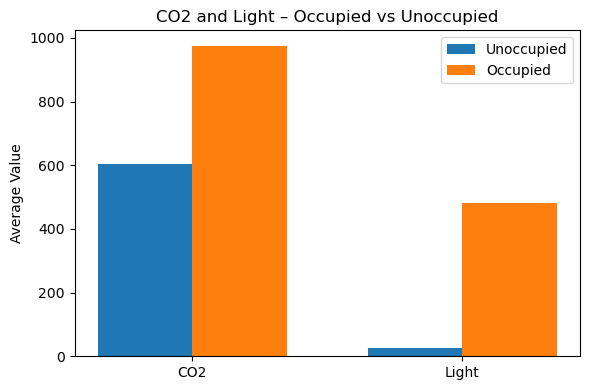

In [193]:
labels = ['CO2', 'Light']
unoccupied = [605.00, 25.24]
occupied = [975.32, 481.97]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(6, 4))
plt.bar(x, unoccupied, width=width, label='Unoccupied')
plt.bar([i + width for i in x], occupied, width=width, label='Occupied')
plt.xticks([i + width / 2 for i in x], labels)
plt.ylabel("Average Value")
plt.title("CO2 and Light – Occupied vs Unoccupied")
plt.legend()
plt.tight_layout()
plt.show()

In [194]:
occupied_stats = df[df["Occupancy"] == 1]["Temperature"].describe().round(2)
occupied_stats

count    4750.00
mean       21.98
std         0.82
min        19.50
25%        21.50
50%        21.89
75%        22.34
max        24.41
Name: Temperature, dtype: float64

**Findings:**
- Occupied: ~22°C
- Unoccupied: ~20.6°C
- Variability: low (std ≈ 0.8°C)

✅ Temperature is slightly higher when occupied, but the difference is modest → moderate relation to occupancy.

## 6.2 – 💨Investigating the CO₂ Levels
CO₂ is analyzed as a marker of human presence, using histograms and boxplots to examine distribution and variability.

In [199]:
# Compare average CO₂ between occupied and unoccupied states
co2_stats = df.groupby("Occupancy")[["CO2"]].agg(["mean", "std"]).round(2)

# Rename index for clarity if Occupancy is coded as 0/1
try:
    co2_stats.rename(index={0: "Unoccupied", 1: "Occupied"}, inplace=True)
except Exception:
    pass

# Display results
co2_stats

CO2        
              mean     std
Occupancy                 
Unoccupied  605.00  253.03
Occupied    975.32  317.26

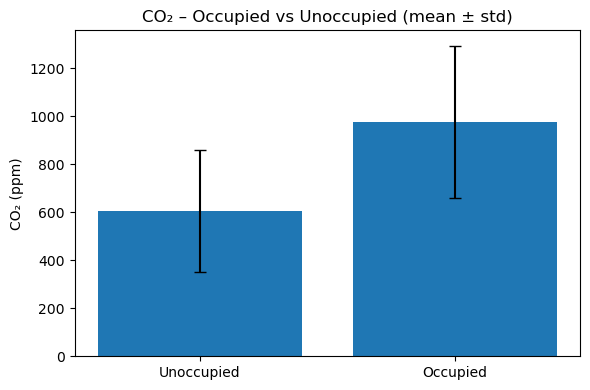

In [201]:
# Bar chart — CO₂: Occupied vs Unoccupied (mean ± std)
import numpy as np
import matplotlib.pyplot as plt

labels = list(co2_stats.index)
means  = co2_stats[("CO2","mean")].values
errs   = co2_stats[("CO2","std")].values

x = np.arange(len(labels))
plt.figure(figsize=(6,4))
plt.bar(x, means, yerr=errs, capsize=4)
plt.xticks(x, labels)
plt.ylabel("CO₂ (ppm)")
plt.title("CO₂ – Occupied vs Unoccupied (mean ± std)")
plt.tight_layout()
plt.show()


In [203]:
# Detailed distribution of CO₂ during occupancy
occupied_co2 = df.loc[df["Occupancy"] == 1, "CO2"].describe().round(2)
occupied_co2


count    4750.00
mean      975.32
std       317.26
min       439.00
25%       763.47
50%       928.58
75%      1120.50
max      2028.50
Name: CO2, dtype: float64

**Findings:**
- Occupied: ~975 ppm
- Unoccupied: ~605 ppm

✅ Clear increase during occupancy → strong predictor of occupancy.

### 6.3 – 💧Humidity by Occupancy

We test if humidity levels differ between occupancy states, using histograms and boxplots to examine distribution and variability.


In [207]:
# Compare average Humidity between occupied and unoccupied states
humidity_stats = df.groupby("Occupancy")[["Humidity"]].agg(["mean", "std"]).round(2)

# Rename index for clarity if Occupancy is coded as 0/1
try:
    humidity_stats.rename(index={0: "Unoccupied", 1: "Occupied"}, inplace=True)
except Exception:
    pass

# Display results
humidity_stats


Humidity      
               mean   std
Occupancy                
Unoccupied    27.53  5.12
Occupied      28.08  4.47

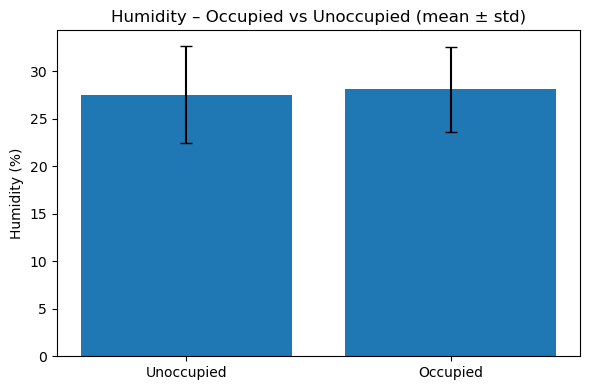

In [209]:
# Bar chart — Humidity: Occupied vs Unoccupied (mean ± std)
labels = list(humidity_stats.index)
means  = humidity_stats[("Humidity","mean")].values
errs   = humidity_stats[("Humidity","std")].values

x = np.arange(len(labels))
plt.figure(figsize=(6,4))
plt.bar(x, means, yerr=errs, capsize=4)
plt.xticks(x, labels)
plt.ylabel("Humidity (%)")
plt.title("Humidity – Occupied vs Unoccupied (mean ± std)")
plt.tight_layout()
plt.show()


In [211]:
# Detailed distribution of Humidity during occupancy
occupied_humidity = df.loc[df["Occupancy"] == 1, "Humidity"].describe().round(2)
occupied_humidity


count    4750.00
mean       28.08
std         4.47
min        18.60
25%        25.20
50%        27.88
75%        31.18
max        39.12
Name: Humidity, dtype: float64

**Findings:**
- Occupied: ~28.1%
- Unoccupied: ~27.5%

✅ Values are almost identical → weak link to occupancy.


### 6.4 – 💡Light by Occupancy

We check how light intensity changes when the room is used, using histograms and boxplots to examine distribution and variability.


In [215]:
# Compare average Light between occupied and unoccupied states
light_stats = df.groupby("Occupancy")[["Light"]].agg(["mean", "std"]).round(2)

# Rename index for clarity if Occupancy is coded as 0/1
try:
    light_stats.rename(index={0: "Unoccupied", 1: "Occupied"}, inplace=True)
except Exception:
    pass

# Display results
light_stats


Light       
              mean    std
Occupancy                
Unoccupied   25.24  81.82
Occupied    481.97  94.70

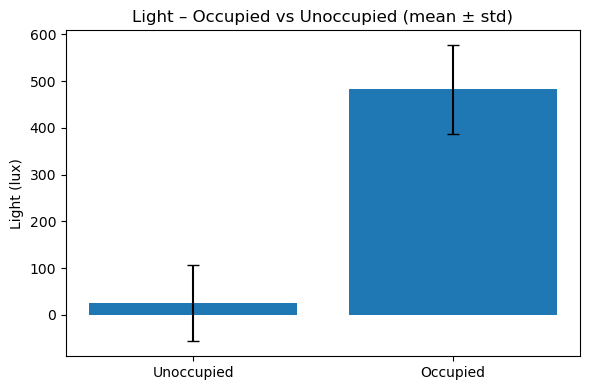

In [217]:
# Bar chart — Light: Occupied vs Unoccupied (mean ± std)
labels = list(light_stats.index)
means  = light_stats[("Light","mean")].values
errs   = light_stats[("Light","std")].values

x = np.arange(len(labels))
plt.figure(figsize=(6,4))
plt.bar(x, means, yerr=errs, capsize=4)
plt.xticks(x, labels)
plt.ylabel("Light (lux)")
plt.title("Light – Occupied vs Unoccupied (mean ± std)")
plt.tight_layout()
plt.show()


In [219]:
# Detailed distribution of Light during occupancy
occupied_light = df.loc[df["Occupancy"] == 1, "Light"].describe().round(2)
occupied_light


count    4750.00
mean      481.97
std        94.70
min         0.00
25%       433.00
50%       454.00
75%       481.58
max      1697.25
Name: Light, dtype: float64

**Findings:**
- Occupied: ~482
- Unoccupied: ~25

✅ Very large difference → strongest indicator of occupancy.


### Summary of Environmental Variable Analysis

Across all four variables (Temperature, CO₂, Humidity, and Light), we observe the following:

- **Temperature** modest increase (~+1.3°C during occupancy)
- **CO₂** rises sharply (from ~605 ppm to ~975 ppm)
- **Humidity** nearly unchanged (~27.5% → 28%)
- **Light** strong jump (25 → 482 units)
- 
✅ Together, these checks confirm that **CO₂ and Light** are the most reliable features for modeling occupancy, while **Temperature** and **Humidity** provide supporting context.


## Step 7 – 🔗 Correlation Analysis

In this step, we analyze the correlations between sensor variables (Temperature, CO₂, Humidity, Light) and occupancy.

📊 Using a correlation matrix and heatmap, we can:
- Identify which variables are most strongly linked to room presence.
- Understand how the different environmental factors interact with each other.
- This helps us select the most relevant features for prediction models.


In [84]:
# Calculate correlation matrix
corr = df[["Temperature", "CO2", "Light", "Humidity", "Occupancy"]].corr().round(2)
corr

,Temperature,CO2,Light,Humidity,Occupancy
Temperature,1.00,0.45,0.69,-0.16,0.56
CO2,0.45,1.00,0.45,0.30,0.50
Light,0.69,0.45,1.00,-0.03,0.91
Humidity,-0.16,0.30,-0.03,1.00,0.05
Occupancy,0.56,0.50,0.91,0.05,1.00


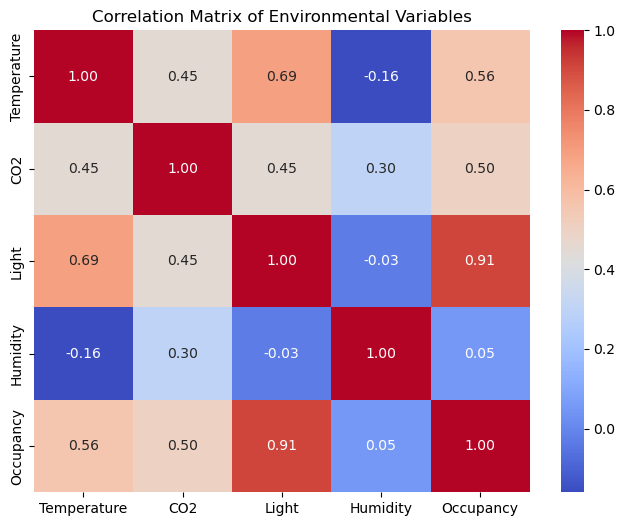

In [86]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Environmental Variables")
plt.show()

## Insight – Correlation Between Variables

The correlation matrix reveals the following:

- **🌡Temperature shows moderate correlation (0.56)** – which aligns with our earlier conclusion that temperature is not fully driven by occupancy.
- **💨CO₂ also correlates positively (0.50)** – indicating human presence contributes to CO₂ levels.
- **💧Humidity has a very weak correlation (0.05)** – suggesting it's less affected by human activity in this case.
- **💡Light has the strongest correlation with Occupancy (0.91)** – lights are almost always on when the room is occupied.

These findings emphasize the value of multi-sensor analysis in smart environments. While some variables reflect presence directly (like light), others (like temperature) require more context to interpret correctly.


## Final Summary – Phase 1

During Phase 1, we explored and analyzed environmental sensor data from a smart campus room to identify key patterns and insights related to room occupancy.

Our main findings are:

- ✅ **Average temperature was lower than expected during occupancy (21.98°C)**, compared to the expected ~25°C.
- 🌡 **Temperature remained stable** with a narrow range and low standard deviation (0.82°C), suggesting active cooling.
- 💨 **CO₂ levels increased significantly during occupancy** (975 vs 605 ppm), validating human presence.
- 💡 **Light values were much higher when the room was occupied** (482 vs 25), showing strong correlation (0.91) with Occupancy.
- 💧 **Humidity showed minimal correlation** with Occupancy, indicating limited sensitivity to human presence.
- 📊 **Correlation analysis confirmed** that Light and CO₂ are the strongest indicators of room occupancy, while Temperature is moderately related.

📌 **Conclusion:**  
The environmental data supports the accuracy of the occupancy labels and reveals that the room is likely cooled consistently by air conditioning. This demonstrates the power of multi-sensor analysis in smart environments and sets the stage for further predictive modeling.


## 📊 Phase 2 – Modeling

Having completed the exploratory data analysis (EDA), correlation checks, and time-based evaluations,
we now move to the predictive modeling phase.

**In this phase**, we will use the environmental sensor variables (Temperature, CO₂, Humidity, Light)
to build models that can predict room occupancy.

We will start with simple baseline models, evaluate their performance,
and then gradually explore more advanced approaches.

## 1. Baseline Classification Model (Logistic Regression)

We begin with a **Logistic Regression** model, which is a simple and interpretable classifier.
It allows us to test how well the environmental features can predict room occupancy.

This baseline model serves as a reference point, helping us evaluate performance before moving on to more advanced models in the next steps.

Accuracy: 0.988
F1 Score: 0.974

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.95      1.00      0.97      1425

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



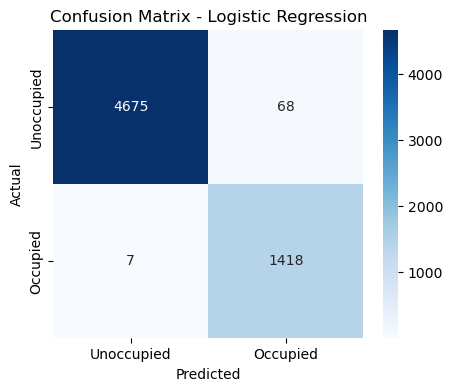

In [110]:

# Features and target
X = df[["Temperature", "CO2", "Humidity", "Light"]]
y = df["Occupancy"]

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Unoccupied", "Occupied"],
            yticklabels=["Unoccupied", "Occupied"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


**✅ Takeaways – Baseline Logistic Regression**

- **High performance:** Accuracy 98.8%, F1-score 0.97.
- **Low errors:** The confusion matrix shows very few misclassifications (few false positives/negatives).
- **Key features:** Light 💡 and CO₂ 🌫️ are the strongest predictors of occupancy.
- **Baseline strength:** Despite its simplicity, Logistic Regression already provides an excellent benchmark for occupancy prediction.

## 2. Random Forest Model
In this step, we apply a Random Forest Classifier, an ensemble model that combines multiple decision trees.
Unlike Logistic Regression, Random Forest can:
- Capture non-linear relationships between variables.
- Handle interactions among features.
- Improve prediction accuracy and robustness by averaging many trees.

This allows us to see if a more complex model provides better performance in predicting room occupancy.

Accuracy: 0.991
F1 Score: 0.982

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.98      0.99      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



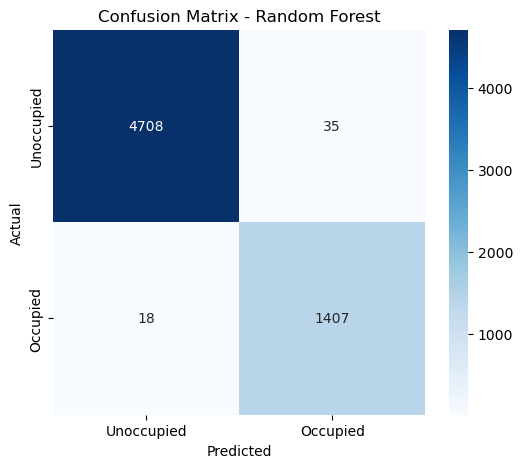

In [119]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluation
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("F1 Score:", round(f1_score(y_test, y_pred_rf), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Unoccupied", "Occupied"], yticklabels=["Unoccupied", "Occupied"])
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Takeaways – Random Forest**

✅ **High performance:** Accuracy = 0.991, F1 = 0.982 (slightly better than Logistic Regression).

🔎 Few misclassifications, with clear separation between occupied and unoccupied states.

🌐 Strength in non-linear relationships: Captures feature interactions (e.g., light + CO₂).

📊 **Robust and reliable:** Improves over the baseline Logistic Regression, though the margin is small since the baseline was already very strong.

## 3. Model Comparison – Logistic Regression vs Random Forest
To evaluate which model performs better, we compare their performance side by side using Accuracy, F1 Score, Precision, and Recall.

| Model               | Accuracy  | F1 Score  | Precision | Recall    |
| ------------------- | --------- | --------- | --------- | --------- |
| Logistic Regression | **0.988** | **0.974** | 0.95–1.00 | 0.99–1.00 |
| Random Forest       | **0.991** | **0.982** | 0.98–1.00 | 0.99–1.00 |


## 📊 Key Insights

- ✅ Random Forest – Accuracy 99.1%, F1 0.982 → best performer.
- ⚡ Logistic Regression – Accuracy 98.8%, F1 0.974 → simpler & interpretable.
- Both models perform extremely well (~99%), with only small differences.
- 🌐 Random Forest captures non-linear patterns (e.g., CO₂ + Light).
- 📖 Logistic Regression is lightweight, fast, and explainable.

👉 Recommendation:
- Use Random Forest for maximum predictive power.
- Use Logistic Regression when transparency and simplicity are key.





---


## 📝 Final Conclusion

🔍 Findings from EDA:
- 💡 Light and 💨 CO₂ → strongest indicators of occupancy.
- 🌡 Temperature → moderate effect.
- 💧 Humidity → weakest relation.

🤖 Modeling Results:
- ⚖️ Logistic Regression – Strong, interpretable baseline (Accuracy 98.8%).
- 🌲 Random Forest – Slightly better (Accuracy 99.1%), captures non-linear patterns.

✅ Overall Insight:
Both models accurately predict room occupancy.
- Use Random Forest → for maximum performance.
- Use Logistic Regression → for simplicity and interpretability.